# Hamilton-Jacobi-equation

In [1]:
import hj_schemes
import hj_tests
import tests
import config
import analysis
import animation

import numpy as np
import matplotlib.pyplot as plt 

from IPython.display import display, Markdown, Latex


test = tests.standingWave

def getBaseConfig():
    c = config.generateConfig(dt=1e-4, t0=0)
    c["dt"]                  = 1e-4
    c["xlim"]                = [0,4]
    c["domainSize"]          = 4
    c["resolution"]          = 100
    c["dimension"]           = 1
    c["stencilOrder"]        = 3
    c["densityYlim"]         = [-4, 4]
    c["plotDensityLogarithm"] =  False
    c["plotPhaseMod2"]       = False 
    c["phaseYlim"]           = [-4, 4]
    c["resolution"]          = 64
    c["timeOrder"]           = 1
    c["dimension"]           = 1
    c["debug"]               = False
    c["slowDown"]            = 1
    c["tEnd"]                = .1
    c["outputTimestep"]      = False
    c["useAdaptiveTimestep"] = False
    c["usePeriodicBC"]       = True
    c["gravity"]             = 0
    c["returnHJDerivative"]  = True
    return c

c = getBaseConfig()


def run(title, scheme, c, ic, solution):
    solver = scheme(c, ic)
    
    animation.drawFrame(solver, title, c, solution, advection = True)
    plt.show()
    i = 0
    while (solver.t < solver.config["tEnd"]):
        solver.step(solver.getTimeStep())
        i += 1

    print(f"Finished in {i} steps.")

    animation.drawFrame(solver, title, c, solution, advection = True)
    plt.show()

## 1D Burger's equation

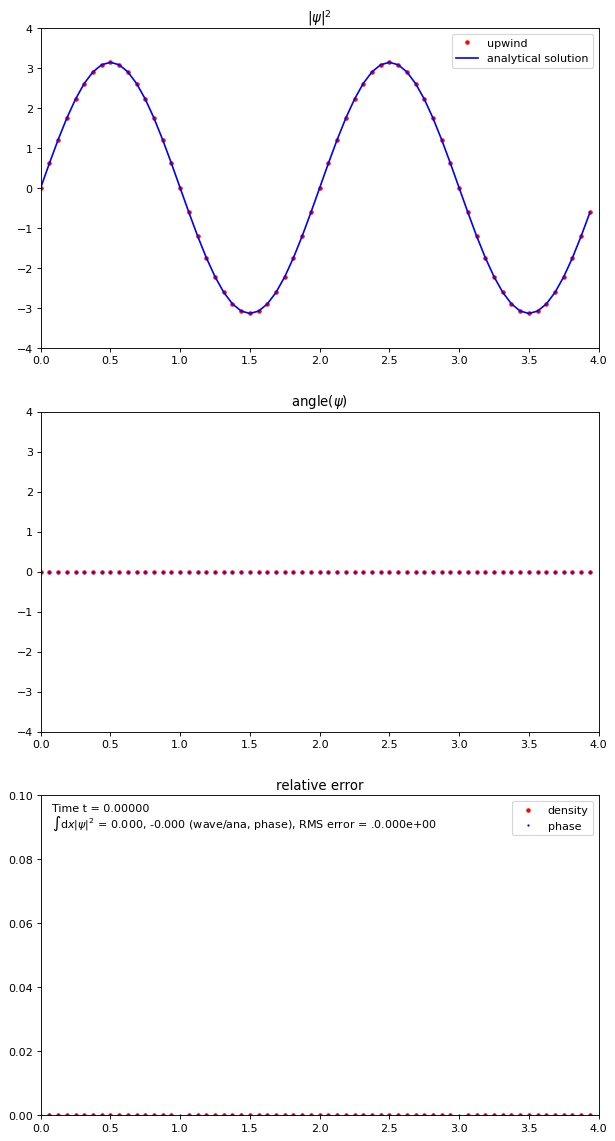

Finished in 1000 steps.


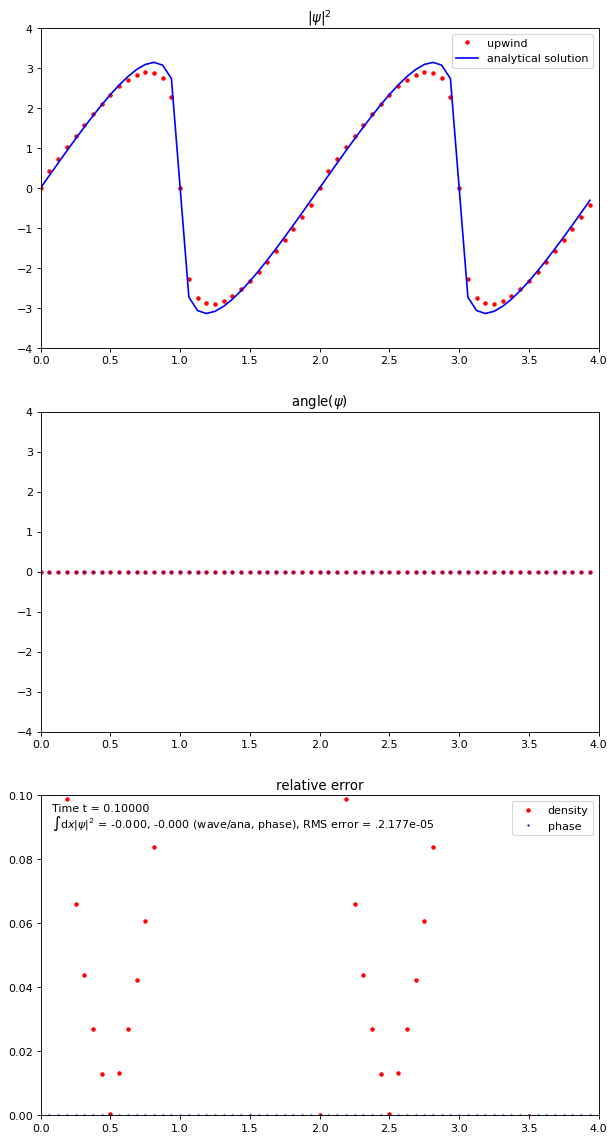

In [2]:
run("upwind", hj_schemes.UpwindScheme, c, hj_tests.eq1, hj_tests.eq1AnalyticalSolution)

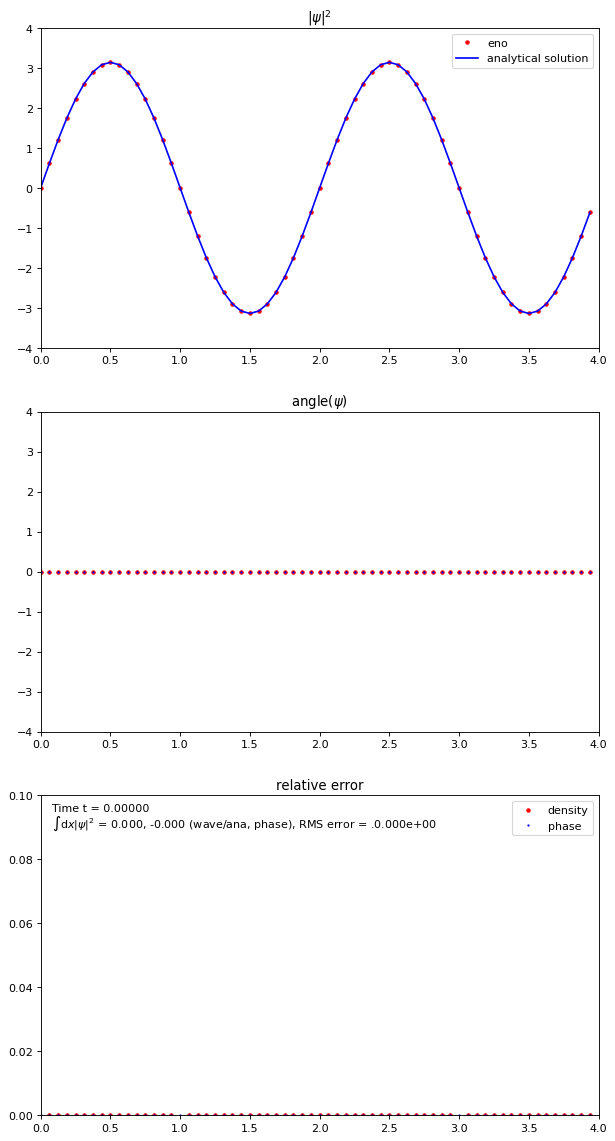

Finished in 1000 steps.


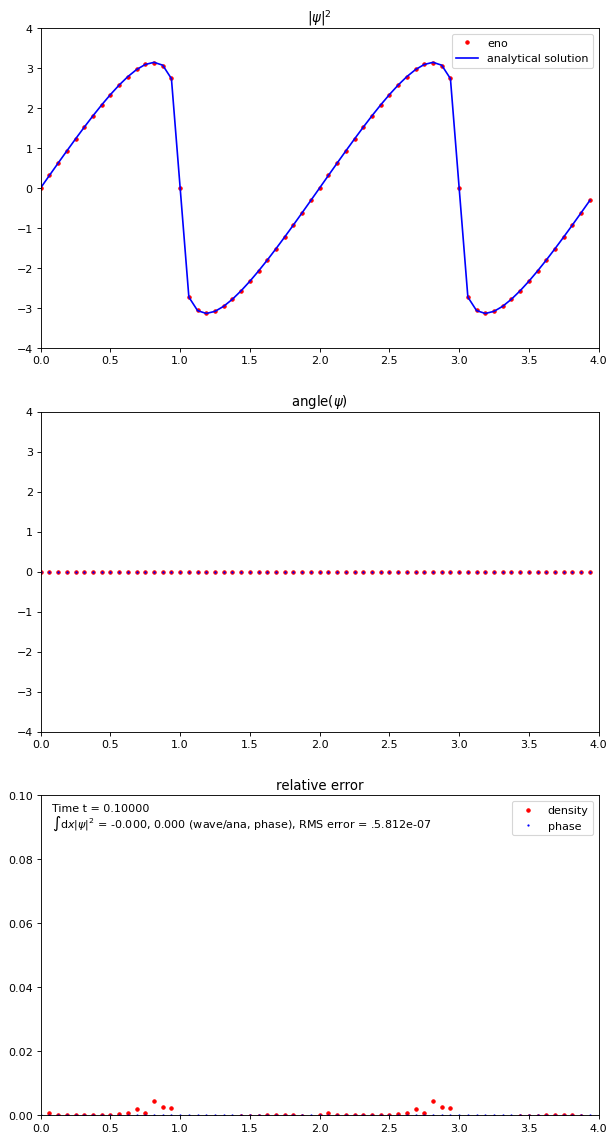

In [3]:
run("eno", hj_schemes.ENOScheme, c, hj_tests.eq1, hj_tests.eq1AnalyticalSolution)

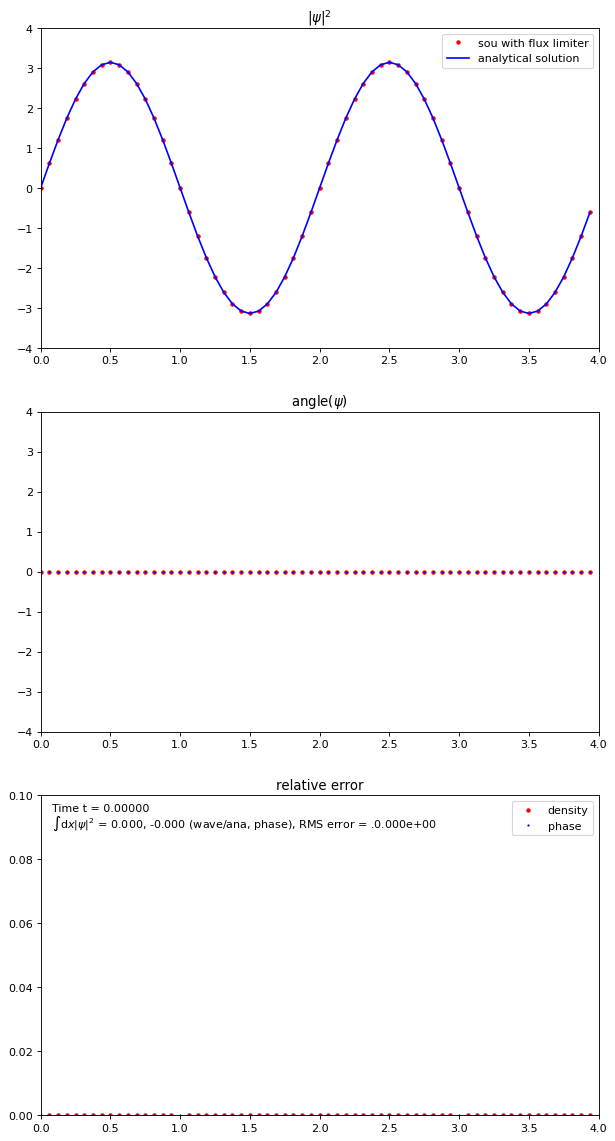

Finished in 1000 steps.


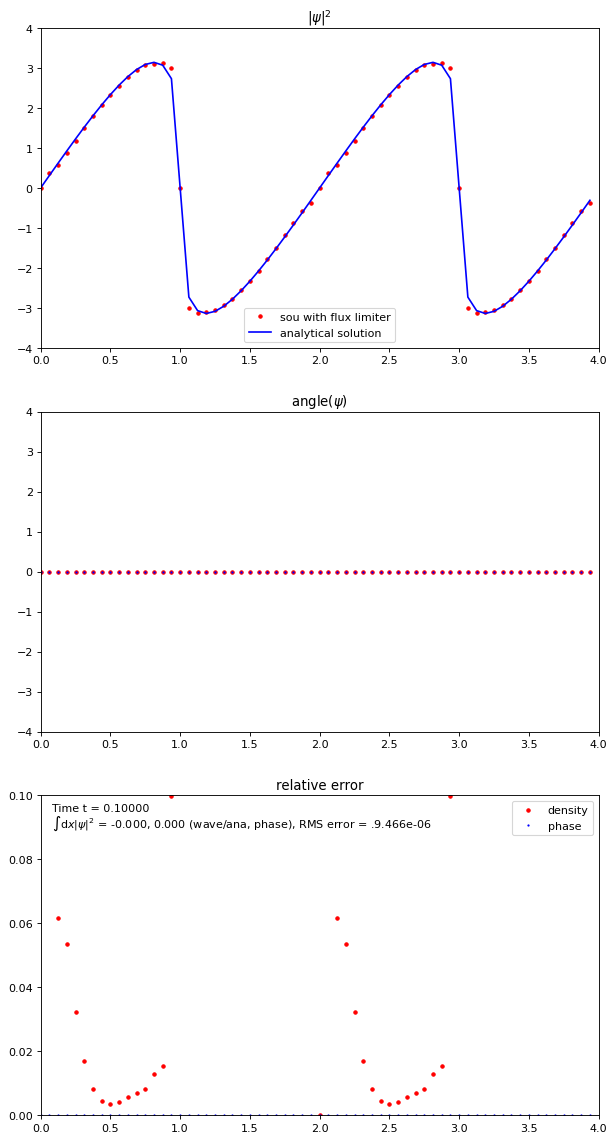

In [4]:
run("sou with flux limiter", hj_schemes.SOUScheme, c, hj_tests.eq1, hj_tests.eq1AnalyticalSolution)

## Burger's equation with different initial conditions

In [6]:
c["xlim"] = [0, 2*np.pi]
c["domainSize"] = 2*np.pi 
c["dimension"] = 1
c["tEnd"] = np.pi/2
c["resolution"] = 16
c["returnHJDerivative"] = False 

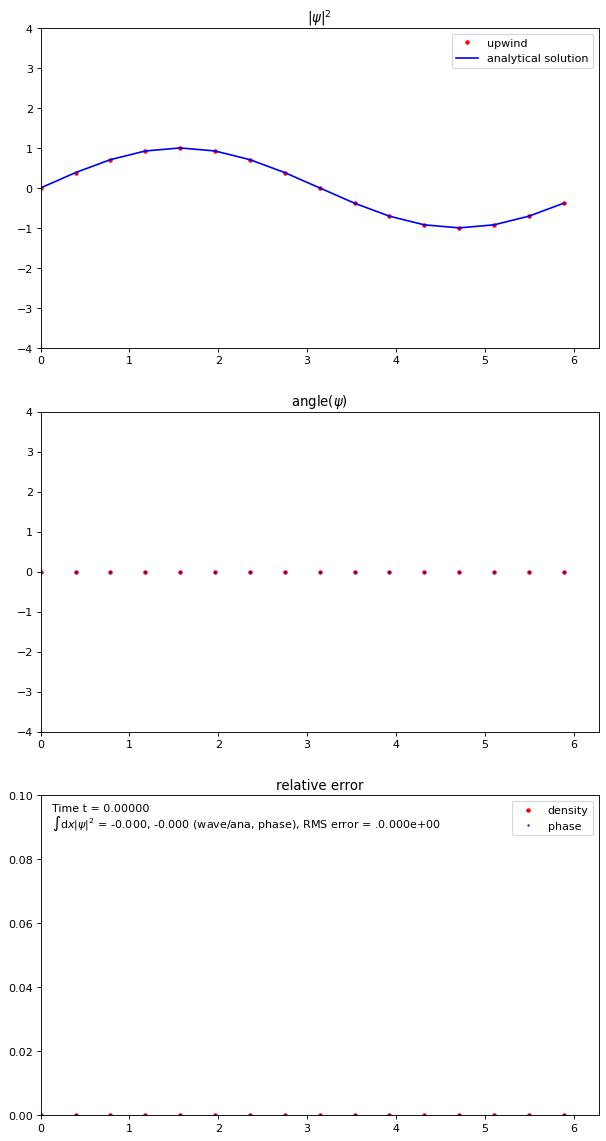

Finished in 15708 steps.


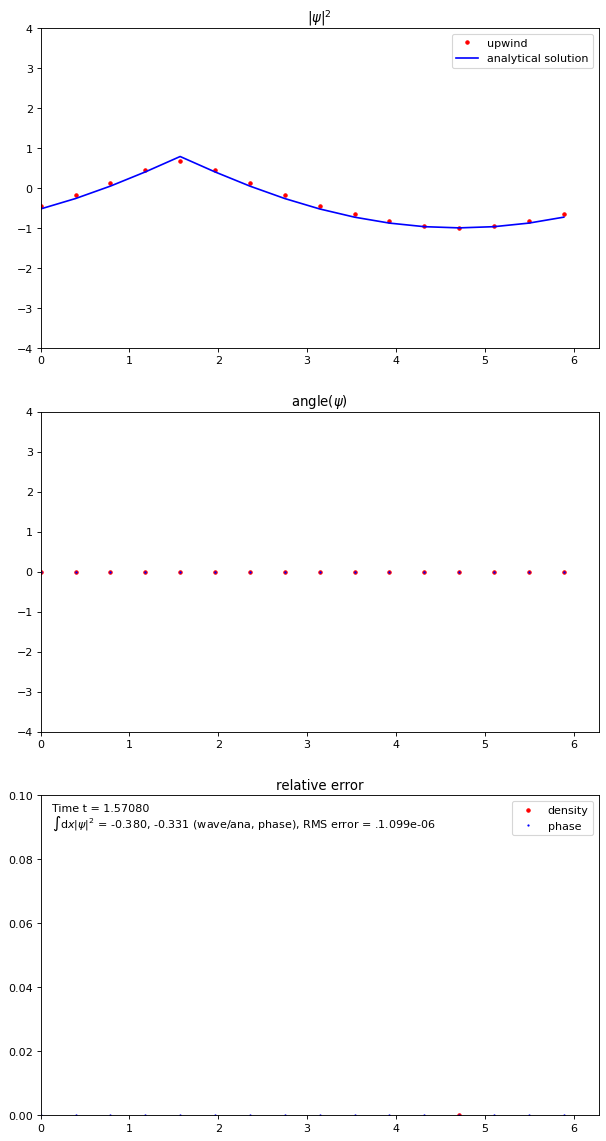

In [20]:
run("upwind", hj_schemes.UpwindScheme, c, hj_tests.eq3, hj_tests.eq3AnalyticalSolution)

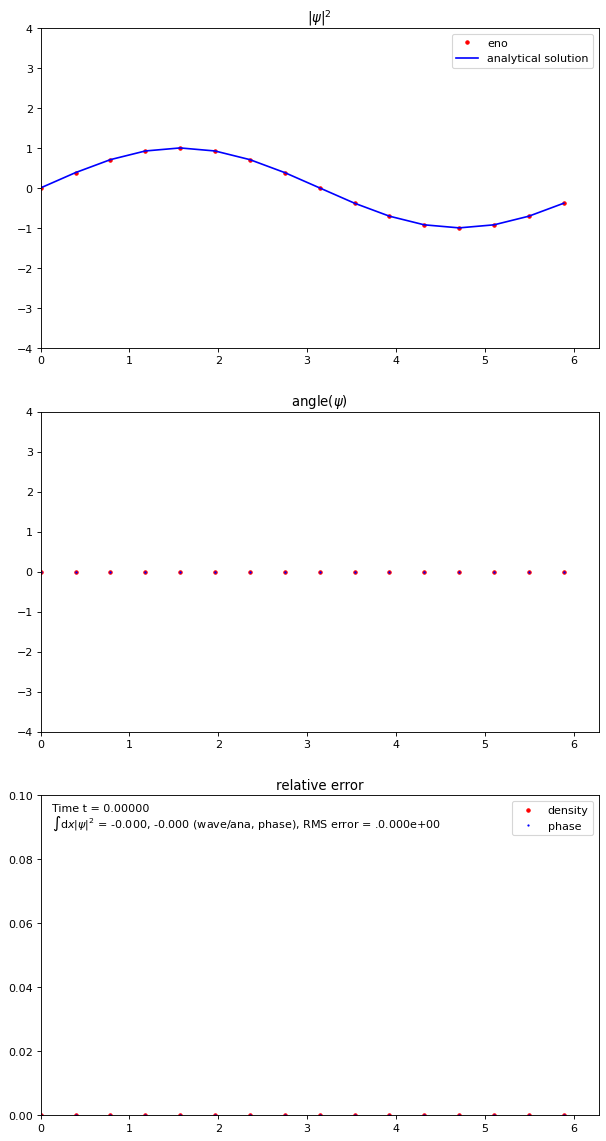

Finished in 15708 steps.


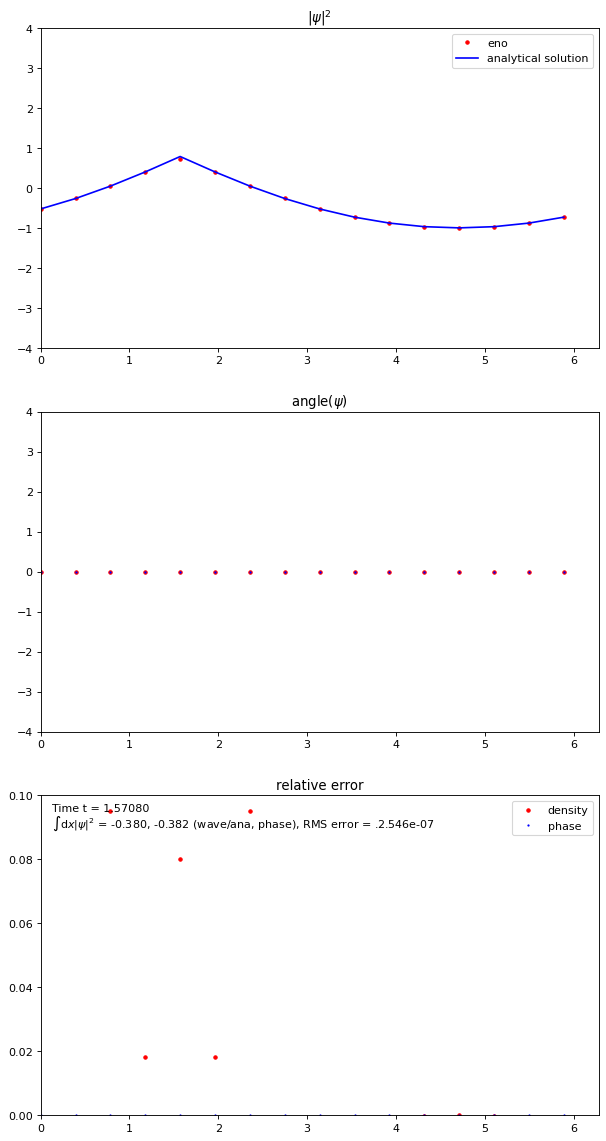

In [21]:
run("eno", hj_schemes.ENOScheme, c, hj_tests.eq3, hj_tests.eq3AnalyticalSolution)

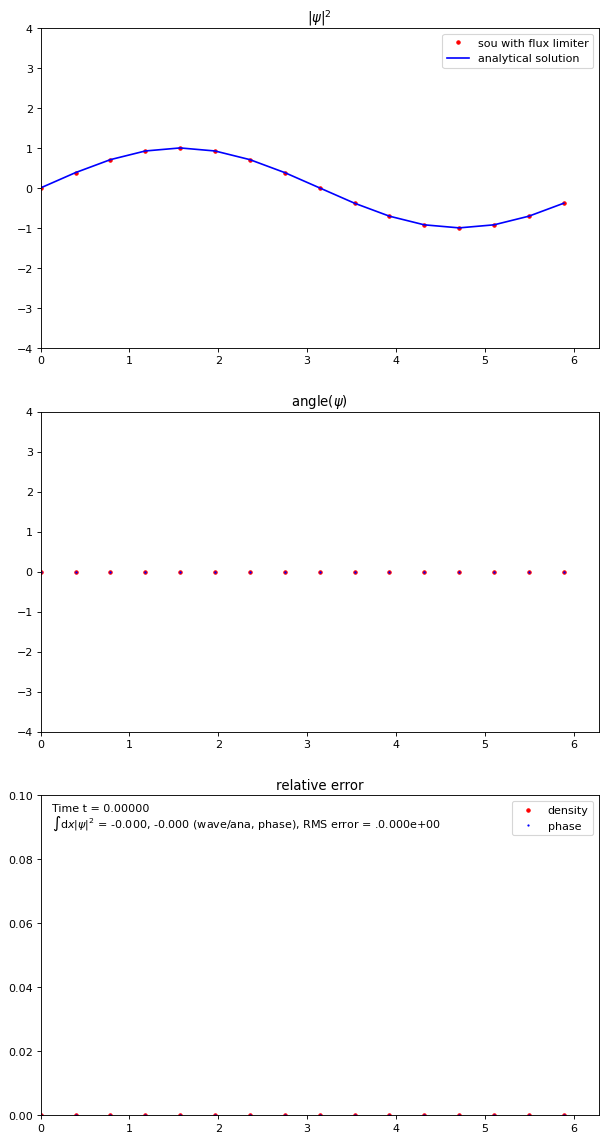

Finished in 15708 steps.


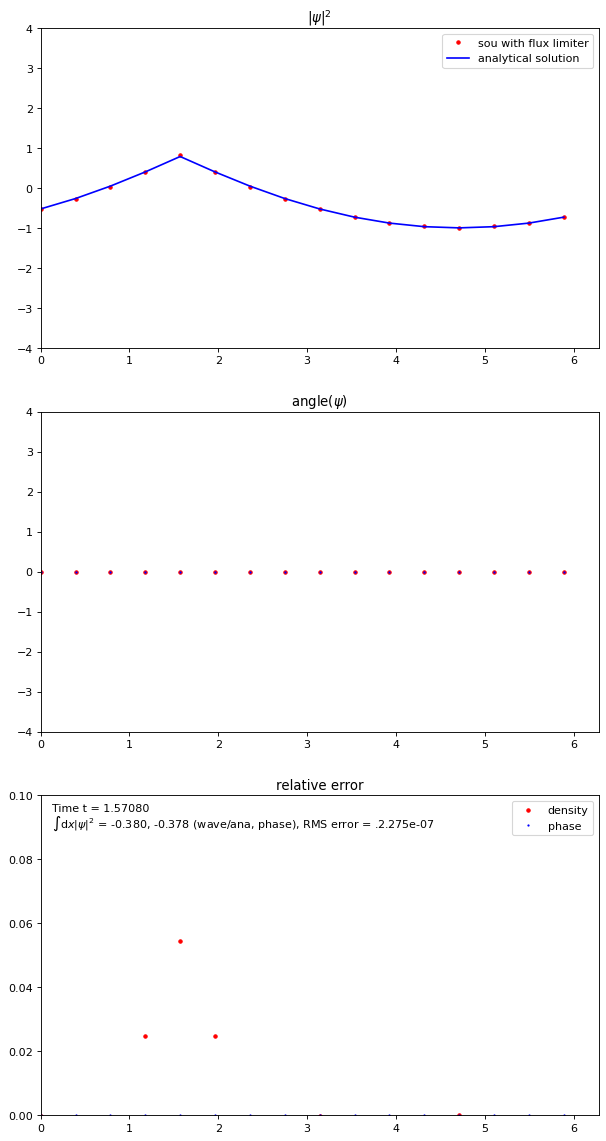

In [8]:
c["fluxLimiter"] = "MINMOD"
run("sou with flux limiter", hj_schemes.SOUScheme, c, hj_tests.eq3, hj_tests.eq3AnalyticalSolution)